In [1]:
import pandas as pd 
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-anna-nikitina/lesson_8/nyc.csv.zip'
df = pd.read_csv(path_to_file, compression='zip')


In [3]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [4]:
def haversine(phi_1, alpha_1, phi_2, alpha_2, radius=6371):
    phi_1_rad, alpha_1_rad, phi_2_rad, alpha_2_rad = map(np.radians, [phi_1, alpha_1, phi_2, alpha_2])
    return 2 * radius * math.asin(math.sqrt(culc_under_squer(phi_1_rad, alpha_1_rad, phi_2_rad, alpha_2_rad)))


def sin_2(a_1, a_2):
    return math.sin((a_2 - a_1)/2) ** 2


def tow_cos(a_1, a_2):
    return math.cos(a_1)*math.cos(a_2)


def culc_under_squer(phi_1, alpha_1, phi_2, alpha_2):
    return sin_2(phi_1, phi_2) + tow_cos(phi_1, phi_2) * sin_2(alpha_1, alpha_2)

In [36]:
%%time

df['distance'] = df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]\
    .apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

CPU times: user 2.14 s, sys: 0 ns, total: 2.14 s
Wall time: 2.14 s


In [35]:
%%time
# более медленный вариант
df['distance'] = df.apply(lambda x: haversine(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis=1)



CPU times: user 2.2 s, sys: 7.83 ms, total: 2.21 s
Wall time: 2.21 s


In [37]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,4.940374
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.874706
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,2.263286
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.665245


In [38]:
longest = df.distance.max()

In [61]:
df['distance_round'] = round(df.distance, 0)
df_long_of_road = df.groupby('distance_round', as_index=False).agg({'key':'count'}).rename(columns={'key':'len_road'})
df_long_of_road.head()

,distance_round,len_road
0,0.0,2880
1,1.0,13964
2,2.0,11904
3,3.0,6893
4,4.0,4061


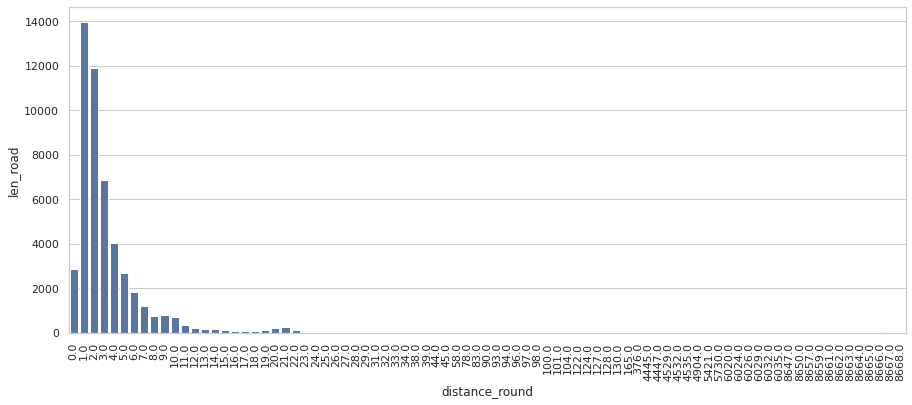

In [62]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=90)
sns.barplot(x="distance_round", y="len_road", data=df_long_of_road,
            label="Alcohol-involved", color="b")

In [5]:
def haversine_v(phi_1, alpha_1, phi_2, alpha_2, radius=6371):
    phi_1_rad, alpha_1_rad, phi_2_rad, alpha_2_rad = map(np.radians, [phi_1, alpha_1, phi_2, alpha_2])
    return 2 * radius * np.arcsin(np.sqrt(culc_under_squer_v(phi_1_rad, alpha_1_rad, phi_2_rad, alpha_2_rad)))


def sin_2_v(a_1, a_2):
    return np.sin((a_2 - a_1)/2) ** 2



def tow_cos_v(a_1, a_2):
    return np.cos(a_1)*np.cos(a_2)


def culc_under_squer_v(phi_1, alpha_1, phi_2, alpha_2):
    return sin_2_v(phi_1, phi_2) + tow_cos_v(phi_1, phi_2) * sin_2_v(alpha_1, alpha_2)

In [6]:
%%time

df['distance'] = haversine_v(df['pickup_latitude'].values, 
                             df['pickup_longitude'].values, 
                             df['dropoff_latitude'].values, 
                             df['dropoff_longitude'].values)




CPU times: user 16.1 ms, sys: 0 ns, total: 16.1 ms
Wall time: 14.1 ms


In [7]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,4.940374
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.874706
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,2.263286
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.665245


In [84]:
df['distance_round'] = round(df.distance, 0)
df_long_of_road = df.groupby('distance_round', as_index=False).agg({'key':'count'}).rename(columns={'key':'len_road'})
df_long_of_road.head()

,distance_round,len_road
0,0.0,2880
1,1.0,13964
2,2.0,11904
3,3.0,6893
4,4.0,4061


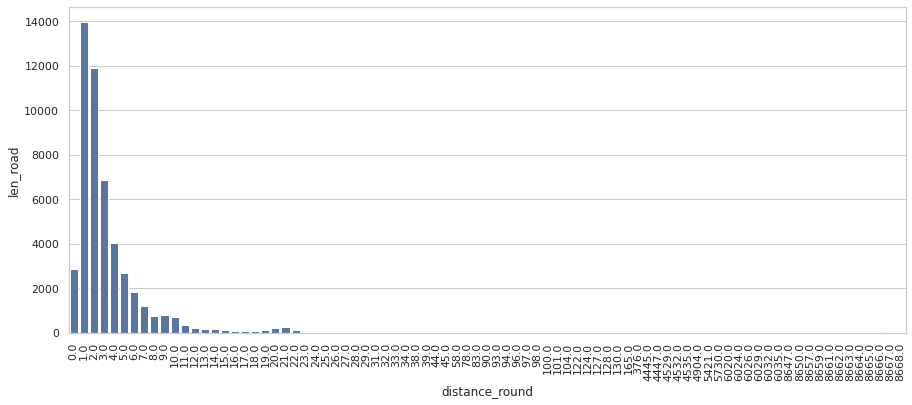

In [85]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=90)
sns.barplot(x="distance_round", y="len_road", data=df_long_of_road,
            label="Alcohol-involved", color="b")

In [102]:
df[(df.dropoff_longitude == 0) | (df.dropoff_latitude == 0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_round
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00 UTC,0.0,0.0,0.0,0.0,3,0.0,0.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00 UTC,0.0,0.0,0.0,0.0,1,0.0,0.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00 UTC,0.0,0.0,0.0,0.0,1,0.0,0.0
124,2013-01-17 17:22:00.00000043,8.0,2013-01-17 17:22:00 UTC,0.0,0.0,0.0,0.0,2,0.0,0.0
192,2010-09-05 17:08:00.00000092,3.7,2010-09-05 17:08:00 UTC,0.0,0.0,0.0,0.0,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
49625,2012-01-09 19:50:27.0000001,12.1,2012-01-09 19:50:27 UTC,0.0,0.0,0.0,0.0,1,0.0,0.0
49816,2012-02-20 00:54:00.000000100,4.9,2012-02-20 00:54:00 UTC,0.0,0.0,0.0,0.0,1,0.0,0.0
49845,2009-03-02 21:57:15.0000001,6.6,2009-03-02 21:57:15 UTC,0.0,0.0,0.0,0.0,3,0.0,0.0
49856,2010-04-19 17:25:00.000000170,10.9,2010-04-19 17:25:00 UTC,0.0,0.0,0.0,0.0,5,0.0,0.0


In [43]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,4.940374
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.874706
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,2.263286
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.665245


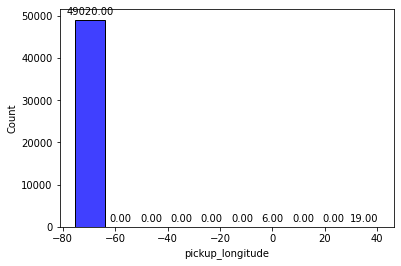

In [22]:
plots = sns.histplot(df.pickup_longitude[df.pickup_longitude != 0], kde=False, 
             bins=10, color = 'blue')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

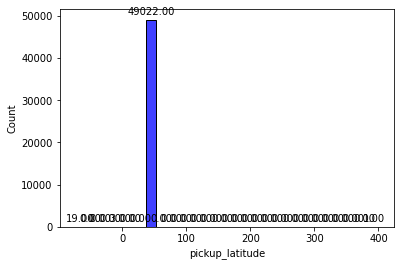

In [28]:
plots = sns.histplot(df.pickup_latitude[df.pickup_latitude != 0], kde=False, 
             bins=30, color = 'blue')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

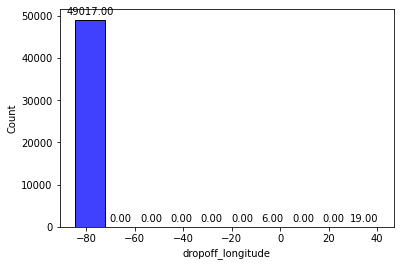

In [24]:
plots = sns.histplot(df.dropoff_longitude[df.dropoff_longitude != 0], kde=False, 
             bins=10, color = 'blue')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

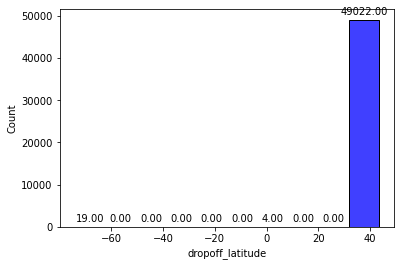

In [26]:
plots = sns.histplot(df.dropoff_latitude[df.dropoff_latitude != 0], kde=False, 
             bins=10, color = 'blue')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

In [29]:
# Условия фильтрации

# 10 < pickup_latitude < 120
# pickup_longitude < -60
# 10 < dropoff_latitude
# dropoff_longitude < -60



In [44]:
df_filter = df.query('pickup_latitude > 10 and pickup_latitude < 120 and  pickup_longitude < -60 and 10 < dropoff_latitude and dropoff_longitude < -60')

In [62]:
df_filter['distance'] = haversine_v(df_filter['pickup_latitude'].values, 
                                 df_filter['pickup_longitude'].values, 
                                 df_filter['dropoff_latitude'].values, 
                                 df_filter['dropoff_longitude'].values)
df_filter = df_filter.query('distance < 50').sort_values(by='distance', ascending=False)

In [65]:
df_filter.head(1).fare_amount

32795    136.0
Name: fare_amount, dtype: float64